> # Imports

In [1]:
#my modules
import acquire as ac
import prepare as pp
import explore as exp
import matplotlib.pyplot as plt

#standard
import pandas as pd
import numpy as np
import re
import seaborn as sns


#scraping
import requests
from requests import get
from bs4 import BeautifulSoup

#file
import os
import json
from typing import Dict, List, Optional, Union, cast


import nltk
from nltk.probability import FreqDist

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#import for testing
import stats_conclude as sc

json file found and loaded
imports loaded successfully, awaiting commands...


## Acquire

In [2]:
#get the data
click_data = ac.button_click()
click_data

json file found and loaded


,string
0,sindresorhus / awesome
1,vinta / awesome-python
2,awesome-selfhosted / awesome-selfhosted
3,avelino / awesome-go
4,trimstray / the-book-of-secret-knowledge
...,...
735,hetznercloud / awesome-hcloud
736,chinaBerg / awesome-canvas
737,RichardLitt / awesome-conferences
738,styfle / awesome-desktop-js


## Prepare

In [3]:
#no duplicated repos
click_data[click_data.duplicated()]

,string


In [4]:
#cleaned the data and changed from a df to a list!
ac.REPOS

['sindresorhus/awesome',
 'vinta/awesome-python',
 'awesome-selfhosted/awesome-selfhosted',
 'avelino/awesome-go',
 'trimstray/the-book-of-secret-knowledge',
 'papers-we-love/papers-we-love',
 '521xueweihan/HelloGitHub',
 'Hack-with-Github/Awesome-Hacking',
 'jaywcjlove/awesome-mac',
 'enaqx/awesome-react',
 'DopplerHQ/awesome-interview-questions',
 'MunGell/awesome-for-beginners',
 'sindresorhus/awesome-nodejs',
 'prakhar1989/awesome-courses',
 'Solido/awesome-flutter',
 'fffaraz/awesome-cpp',
 'wasabeef/awesome-android-ui',
 'binhnguyennus/awesome-scalability',
 'vsouza/awesome-ios',
 'tiimgreen/github-cheat-sheet',
 'dypsilon/frontend-dev-bookmarks',
 'akullpp/awesome-java',
 'brillout/awesome-react-components',
 'serhii-londar/open-source-mac-os-apps',
 'rust-unofficial/awesome-rust',
 'dkhamsing/open-source-ios-apps',
 'DovAmir/awesome-design-patterns',
 'ziadoz/awesome-php',
 'goabstract/Awesome-Design-Tools',
 'alebcay/awesome-shell',
 'herrbischoff/awesome-macos-command-line',


In [5]:
scraped = ac.get_scraped_data()

json file found and loaded


In [6]:
len(scraped)

740

In [7]:
#GOT THE DATA! Look at it...
scraped

,repo,language,readme_contents
0,sindresorhus/awesome,None,"<div align=""center"">\n\t<a href=""https://vshym..."
1,vinta/awesome-python,Python,# Awesome Python [![Awesome](https://cdn.rawgi...
2,awesome-selfhosted/awesome-selfhosted,Makefile,# Awesome-Selfhosted\n\n[![Awesome](https://cd...
3,avelino/awesome-go,Go,"# Awesome Go\n\n<a href=""https://awesome-go.co..."
4,trimstray/the-book-of-secret-knowledge,None,"<p align=""center"">\n <a href=""https://github...."
...,...,...,...
735,hetznercloud/awesome-hcloud,None,# Awesome Hetzner Cloud\n\nA curated list of l...
736,chinaBerg/awesome-canvas,None,![](./assets/logo.png)\n## awesome-canvas\nLis...
737,RichardLitt/awesome-conferences,Ruby,# Awesome Conferences [![Awesome](https://cdn....
738,styfle/awesome-desktop-js,None,"<img width=""128"" height=""128"" src=""https://cd..."


In [8]:
#readme_contents looks like what I need.. but how many did I grab?
len(scraped)

740

In [9]:
#clean the readme
df = pp.clean_df(scraped, 'readme_contents')
df

,repo,language,readme
0,sindresorhus/awesome,other,div align center href http vshymanskyy standwi...
1,vinta/awesome-python,python,awesome python awesome http cdn rawgit sindres...
2,awesome-selfhosted/awesome-selfhosted,other,awesome selfhosted awesome http cdn jsdelivr n...
3,avelino/awesome-go,go,awesome go href http awesome go img align righ...
4,trimstray/the-book-of-secret-knowledge,other,p align center href http trimstray book secret...
...,...,...,...
735,hetznercloud/awesome-hcloud,other,awesome hetzner cloud curated list library too...
736,chinaBerg/awesome-canvas,other,asset logo png awesome canvas list awesome htm...
737,RichardLitt/awesome-conferences,other,awesome conference awesome http cdn rawgit sin...
738,styfle/awesome-desktop-js,other,img width height src http cdn jsdelivr net npm...


In [10]:
#assign langugages to keep
languages = ['python', 'javaScript', 'html', 'shell', 'java', 'go']

#edit the languages but keep the data
df['language'] = df['language'].apply(lambda row: row if row in languages else 'other')
df.language.value_counts()

other     635
python     40
html       25
shell      19
java       11
go         10
Name: language, dtype: int64

## Explore

train, validate, test = 

In [11]:
#checking for nulls
df.isnull().sum()

repo        0
language    0
readme      0
dtype: int64

In [12]:
df.groupby('language').sum()

,repo,readme
language,,
go,avelino/awesome-gotmrts/go-patternsyjjnls/awes...,awesome go href http awesome go img align righ...
html,docker/awesome-composeterkelg/awesome-creative...,awesome compose awesome http awesome badge svg...
java,Freelander/Android_Dataamitshekhariitbhu/Andro...,p align center special thanks generous sponsor...
other,sindresorhus/awesomeawesome-selfhosted/awesome...,div align center href http vshymanskyy standwi...
python,vinta/awesome-python521xueweihan/HelloGitHubRu...,awesome python awesome http cdn rawgit sindres...
shell,papers-we-love/papers-we-loveunixorn/awesome-z...,paper love paperswelove image logo top svg dis...


In [13]:
df.columns

Index(['repo', 'language', 'readme'], dtype='object')

In [14]:
df.head()

,repo,language,readme
0,sindresorhus/awesome,other,div align center href http vshymanskyy standwi...
1,vinta/awesome-python,python,awesome python awesome http cdn rawgit sindres...
2,awesome-selfhosted/awesome-selfhosted,other,awesome selfhosted awesome http cdn jsdelivr n...
3,avelino/awesome-go,go,awesome go href http awesome go img align righ...
4,trimstray/the-book-of-secret-knowledge,other,p align center href http trimstray book secret...


          letter_count
language              
go        44357.600000
html      26792.080000
java      32000.545455
other     30107.943307
python    31288.750000
shell     29183.526316


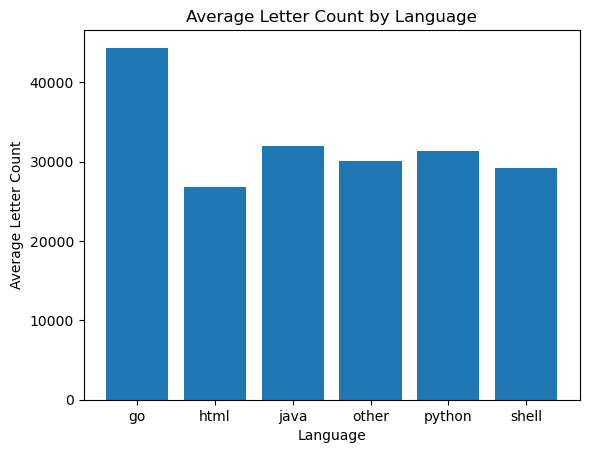

In [15]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the letter count for each row
df['letter_count'] = df['readme'].apply(lambda x: len(x))

# Group by language and calculate the average letter count
grouped_data = df.groupby('language').agg('mean')
print(grouped_data)

# Create a bar plot
plt.bar(grouped_data.index, grouped_data.letter_count)
plt.xlabel('Language')
plt.ylabel('Average Letter Count')
plt.title('Average Letter Count by Language')
plt.show()



In [16]:
df.head()

,repo,language,readme,letter_count
0,sindresorhus/awesome,other,div align center href http vshymanskyy standwi...,55076
1,vinta/awesome-python,python,awesome python awesome http cdn rawgit sindres...,65066
2,awesome-selfhosted/awesome-selfhosted,other,awesome selfhosted awesome http cdn jsdelivr n...,212760
3,avelino/awesome-go,go,awesome go href http awesome go img align righ...,236388
4,trimstray/the-book-of-secret-knowledge,other,p align center href http trimstray book secret...,160153


In [17]:
sc.compare_categorical_continuous('language', 'letter_count', df)

Levene Test Successful
p-value = nan. There is no significant difference between the means of language and letter_count.


In [18]:
df['letter_count'].astype('int')

0       55076
1       65066
2      212760
3      236388
4      160153
        ...  
735      9908
736     60579
737     19531
738      4292
739      5383
Name: letter_count, Length: 740, dtype: int64

In [19]:
df.dtypes

repo            object
language        object
readme          object
letter_count     int64
dtype: object

Are there any words that uniquely identify a programming language?

In [20]:
word_counts = exp.get_words(df)
word_counts

Unfiltered Data:187478 words  Filtered Data: 4000 words



,all,python,javascript,html,shell,java,go,other
http,216540,13261,0,5534,6164,2811,4422,184348
img,22653,2659,0,112,268,1171,131,18312
code,14547,1457,0,243,198,209,276,12164
awesome,13657,412,0,309,369,43,113,12411
source,12575,408,0,217,146,121,107,11576
...,...,...,...,...,...,...,...,...
reducing,76,2,0,1,3,0,1,69
ga,76,4,0,0,0,0,0,72
knife,76,1,0,3,2,0,2,68
indie,76,1,0,2,8,0,0,65


In [21]:
#proportion of languages
def show_counts_and_ratios(df, column):
    """
    Takes in a dataframe and a string of a single column
    Returns a dataframe with absolute value counts and percentage value counts
    """
    labels = pd.concat([df[column].value_counts(),
                    df[column].value_counts(normalize=True)], axis=1).round(2)
    labels.columns = ['n', 'percent']
    labels
    return labels

#added to explore.py

In [22]:
word_counts

,all,python,javascript,html,shell,java,go,other
http,216540,13261,0,5534,6164,2811,4422,184348
img,22653,2659,0,112,268,1171,131,18312
code,14547,1457,0,243,198,209,276,12164
awesome,13657,412,0,309,369,43,113,12411
source,12575,408,0,217,146,121,107,11576
...,...,...,...,...,...,...,...,...
reducing,76,2,0,1,3,0,1,69
ga,76,4,0,0,0,0,0,72
knife,76,1,0,3,2,0,2,68
indie,76,1,0,2,8,0,0,65


In [23]:
word_counts.head(0)

,all,python,javascript,html,shell,java,go,other


In [24]:
language_columns = [col for col in df.columns if col != 'all']

word_frequencies = {language: {} for language in language_columns}

for index, row in df.head(100).iterrows():
    for language in language_columns:
        word = row[language]       
        if pd.notnull(word):
            if word in word_frequencies[language]:
                word_frequencies[language][word] += 1
            else:
                word_frequencies[language][word] = 1
for language in language_columns:
    print(f"Word frequencies for {language}:")
    print(word_frequencies[language])
    print()

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



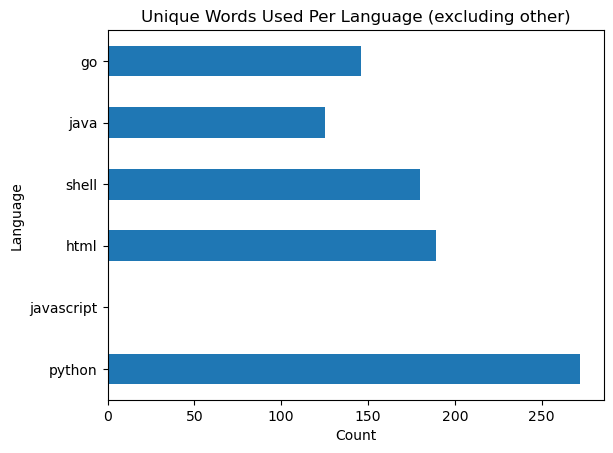

In [25]:
word_counts.drop(columns={'all', 'other'}).nunique().plot.barh()
plt.title('Unique Words Used Per Language (excluding other)')
plt.xlabel('Count')
plt.ylabel('Language')
plt.show()

In [29]:
word_counts.head()

,all,python,javascript,html,shell,java,go,other
http,216540,13261,0,5534,6164,2811,4422,184348
img,22653,2659,0,112,268,1171,131,18312
code,14547,1457,0,243,198,209,276,12164
awesome,13657,412,0,309,369,43,113,12411
source,12575,408,0,217,146,121,107,11576


In [33]:
df['unique_words'] = df.groupby('language')['readme'].transform(lambda x: len(set(x.str.split().sum())))
df.groupby()

,repo,language,readme,letter_count,unique_words
0,sindresorhus/awesome,other,div align center href http vshymanskyy standwi...,55076,168502
1,vinta/awesome-python,python,awesome python awesome http cdn rawgit sindres...,65066,22398
2,awesome-selfhosted/awesome-selfhosted,other,awesome selfhosted awesome http cdn jsdelivr n...,212760,168502
3,avelino/awesome-go,go,awesome go href http awesome go img align righ...,236388,9875
4,trimstray/the-book-of-secret-knowledge,other,p align center href http trimstray book secret...,160153,168502
...,...,...,...,...,...
735,hetznercloud/awesome-hcloud,other,awesome hetzner cloud curated list library too...,9908,168502
736,chinaBerg/awesome-canvas,other,asset logo png awesome canvas list awesome htm...,60579,168502
737,RichardLitt/awesome-conferences,other,awesome conference awesome http cdn rawgit sin...,19531,168502
738,styfle/awesome-desktop-js,other,img width height src http cdn jsdelivr net npm...,4292,168502


In [37]:
df_1 = df.groupby('unique_words')

In [39]:
df_1.head()

,repo,language,readme,letter_count,unique_words
0,sindresorhus/awesome,other,div align center href http vshymanskyy standwi...,55076,168502
1,vinta/awesome-python,python,awesome python awesome http cdn rawgit sindres...,65066,22398
2,awesome-selfhosted/awesome-selfhosted,other,awesome selfhosted awesome http cdn jsdelivr n...,212760,168502
3,avelino/awesome-go,go,awesome go href http awesome go img align righ...,236388,9875
4,trimstray/the-book-of-secret-knowledge,other,p align center href http trimstray book secret...,160153,168502
5,papers-we-love/papers-we-love,shell,paper love paperswelove image logo top svg dis...,3448,11579
6,521xueweihan/HelloGitHub,python,p align center img src http raw githubusercont...,3413,22398
7,Hack-with-Github/Awesome-Hacking,other,awesome hacking awesome hacking jpg awesome ha...,8750,168502
8,jaywcjlove/awesome-mac,other,awesome mac rehype style font size px border b...,60456,168502
35,docker/awesome-compose,html,awesome compose awesome http awesome badge svg...,7513,13523


In [28]:
sc.compare_categorical_continuous('language', 'count', word_counts)

KeyError: 'count'

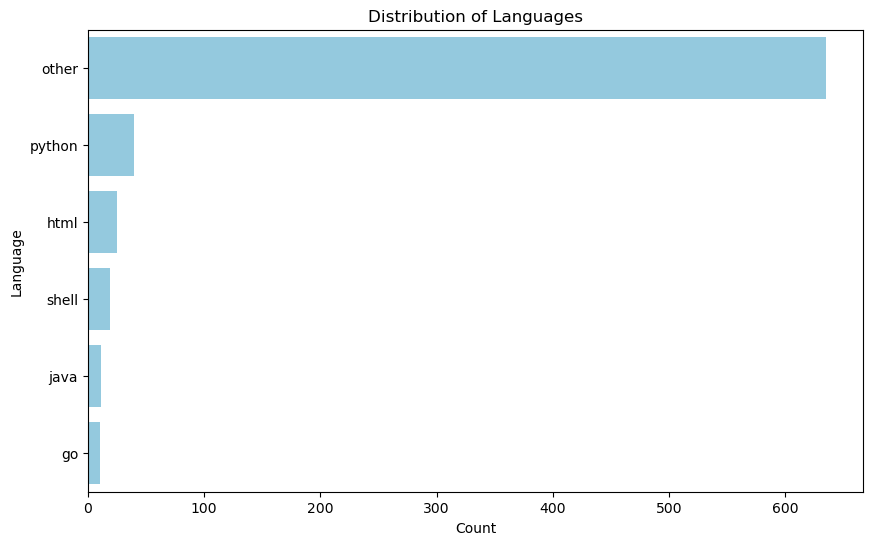

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(y='language', data=df, order=df['language'].value_counts().index, color='skyblue')
plt.title('Distribution of Languages')
plt.xlabel('Count')
plt.ylabel('Language')
plt.show()

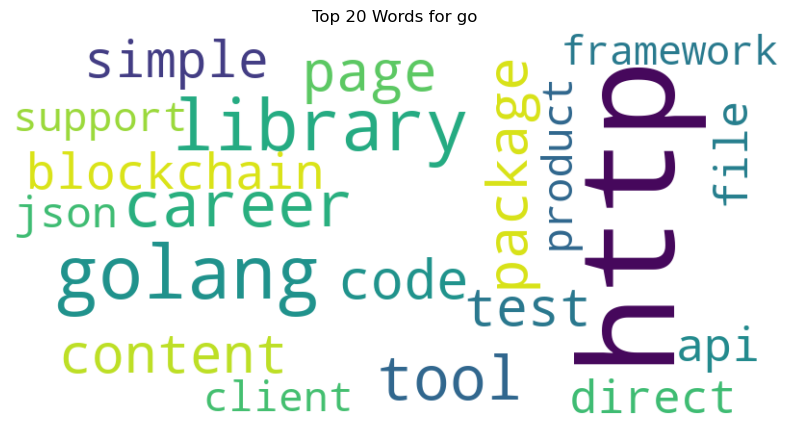

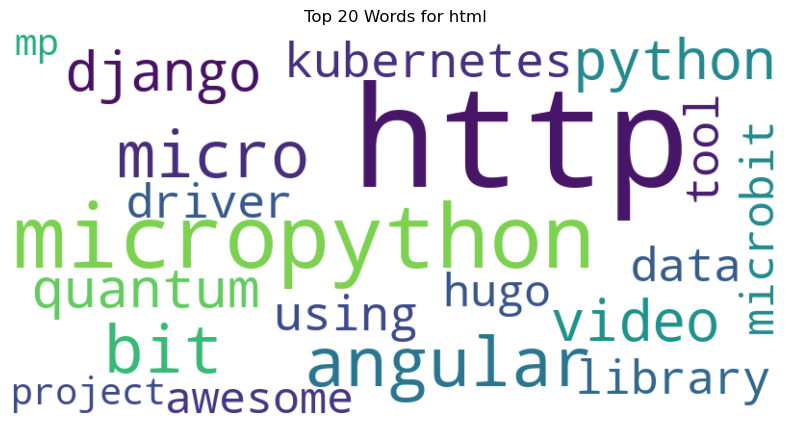

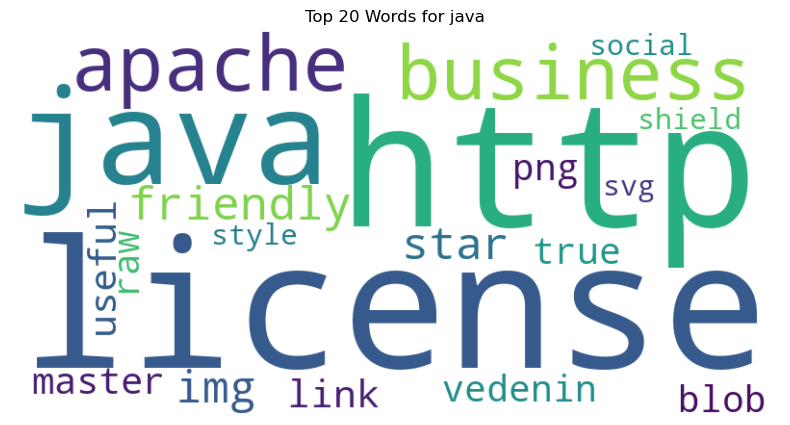

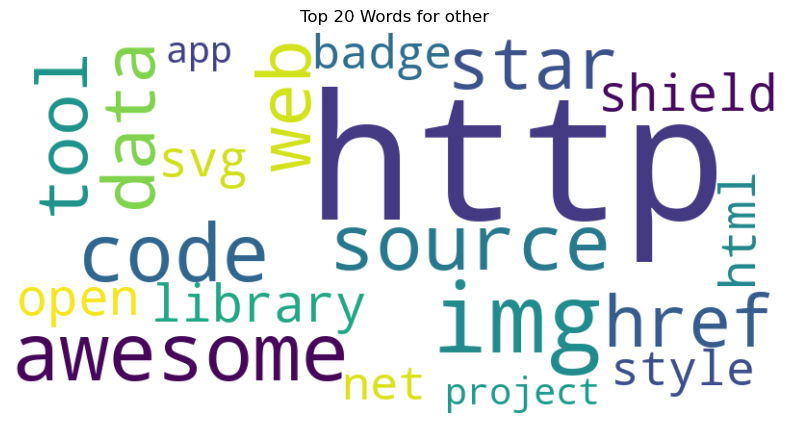

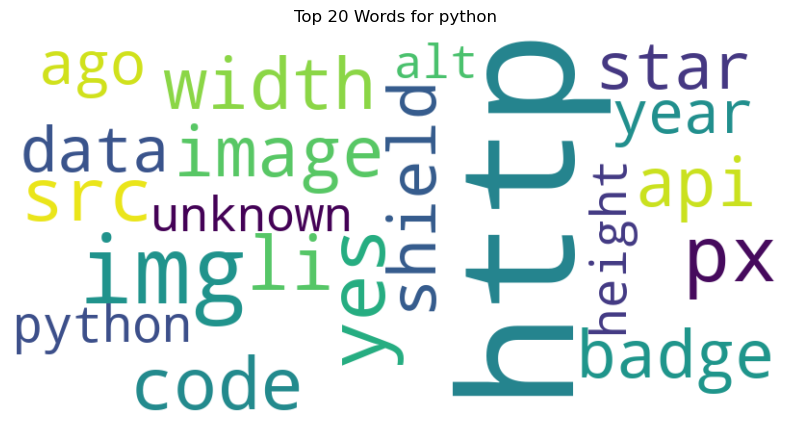

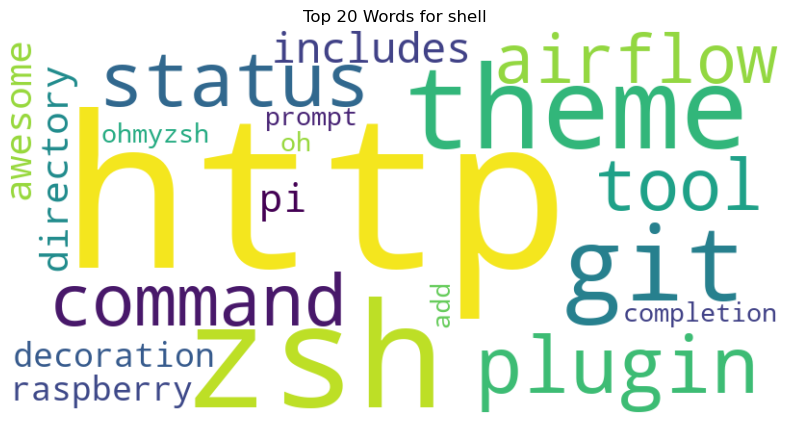

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

# Group the DataFrame by the 'language' column and join all the readme files for each language into a single string
grouped = df.groupby('language')['readme'].apply(' '.join).reset_index()

# Initialize a CountVectorizer
cv = CountVectorizer(stop_words='english')

# For each language, create a word cloud of the top 20 most frequently used words
for i, row in grouped.iterrows():
    # Count the frequency of each word in the readme files for the current language
    word_count = cv.fit_transform([row['readme']])
    words = cv.get_feature_names_out()
    word_freq = word_count.toarray().sum(axis=0)
    word_freq_dict = dict(zip(words, word_freq))

    # Get the top 20 most frequently used words and their frequencies
    top_words = sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True)[:20]
    top_words_dict = dict(top_words)

    # Create a word cloud
    wc = WordCloud(width=800, height=400, max_words=20, background_color='white').generate_from_frequencies(top_words_dict)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Top 20 Words for {row['language']}")
    plt.show()